# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

MIMIC-III: 7420
Number of attribues: 19
Classes total: 6635 - 785

Classes train: 1327 - 663
Classes test:  5308 - 122


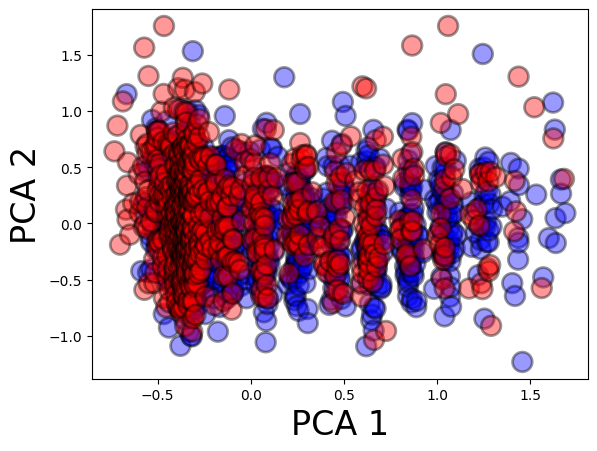

int64


In [2]:
dataset = 'MIMIC-III' # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP-small'
model = 'MLP'
# model = 'MLP-deep'
# model = 'Linear'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])
print(data_clf['data']['y'].dtype)

In [10]:
data_clf['data']['X'].shape

(1990, 19)

## Get Classifier

/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Baseline


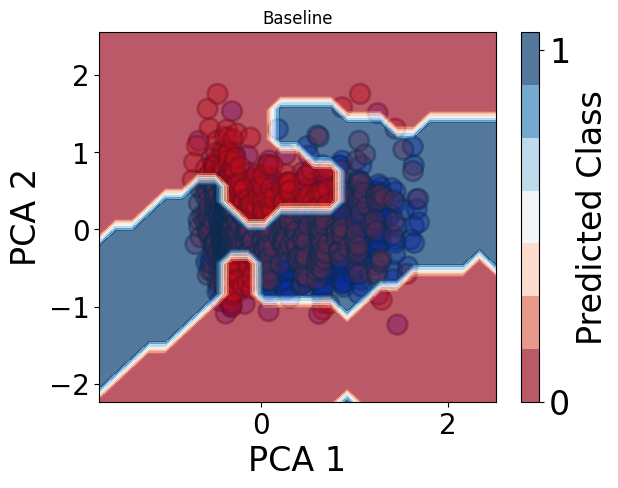

SMOTE


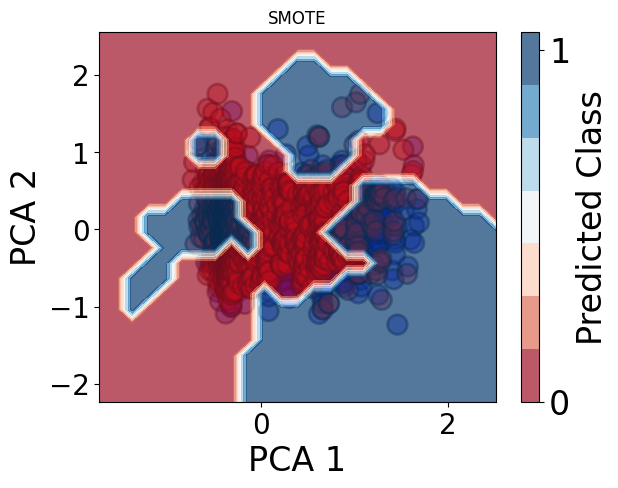

Balanced Weights


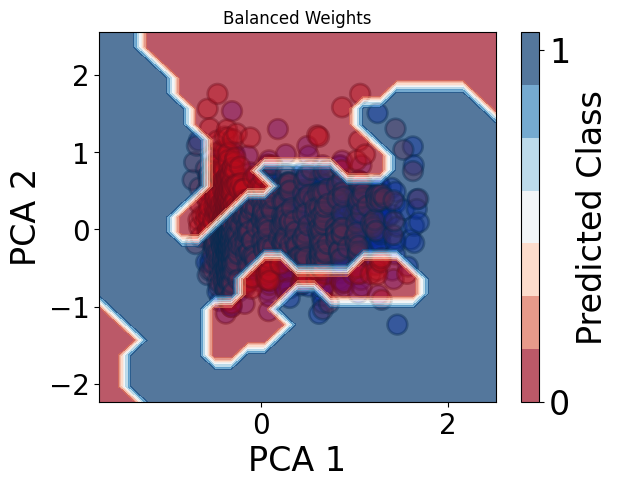

BMR


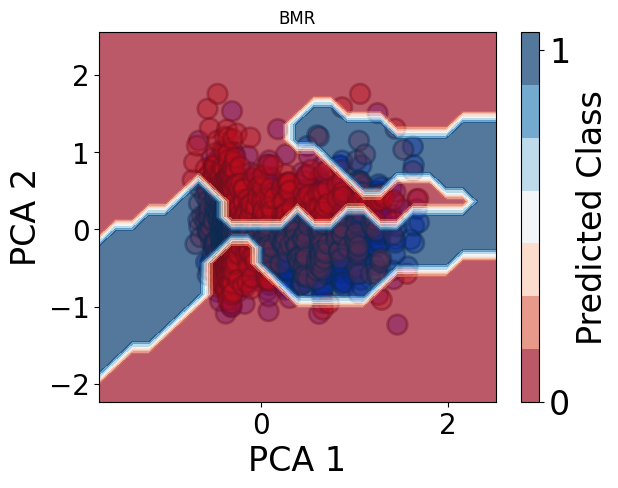

Threshold


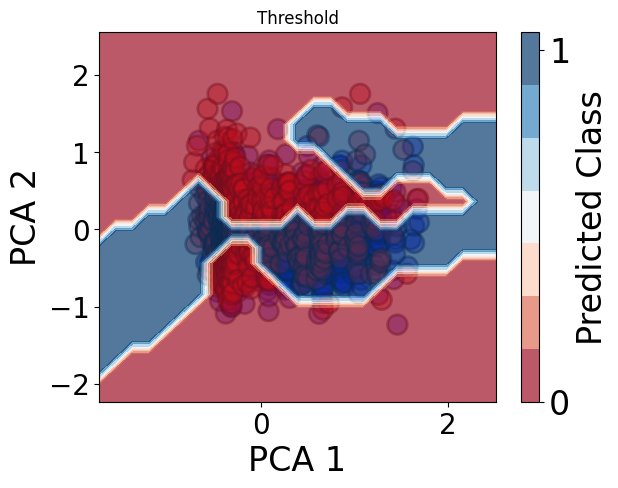

In [3]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

Original Data
plotting training data as data input


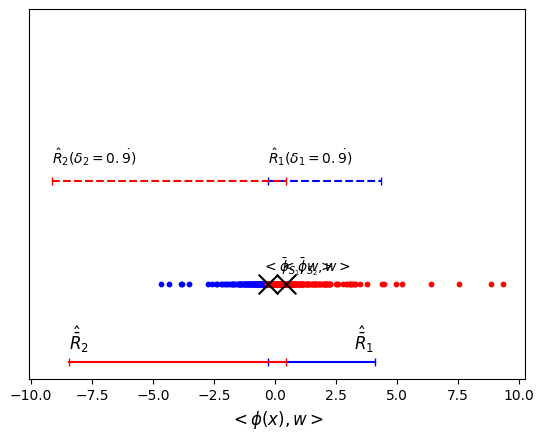

Unable to find result with downsample, increase the max_trials


In [9]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                    #  method='supports-prop-update_mean-margin_only',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

In [5]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

Not fit to any data yet, call 'fit(X, y)'  method first


## Show parameters

In [6]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
                  Accuracy    G-Mean        F1
Method                                        
Baseline          0.755064  0.542365  0.066011
SMOTE             0.721731  0.583040  0.070154
Balanced Weights  0.747145  0.498122  0.055058
BMR               0.687477  0.558910  0.060874
Threshold         0.687477  0.558910  0.060874
Our Method        0.755064  0.542365  0.066011 


Baseline


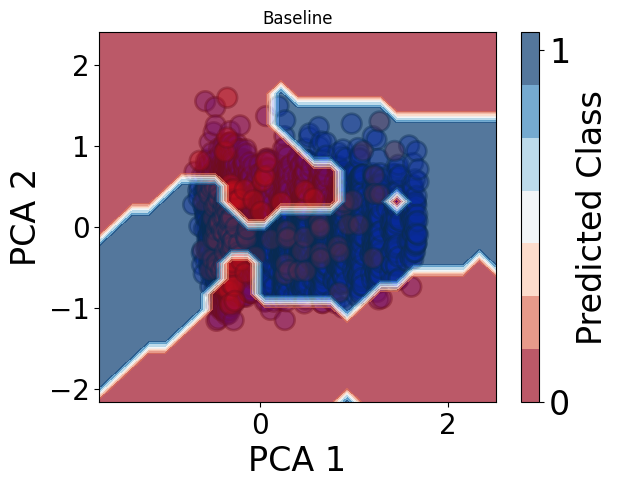

SMOTE


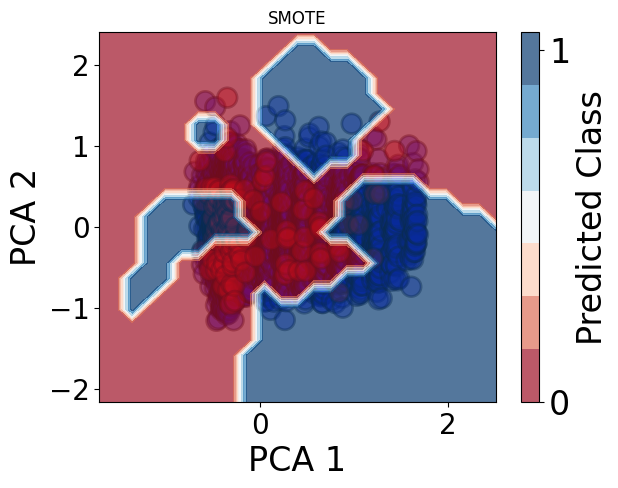

Balanced Weights


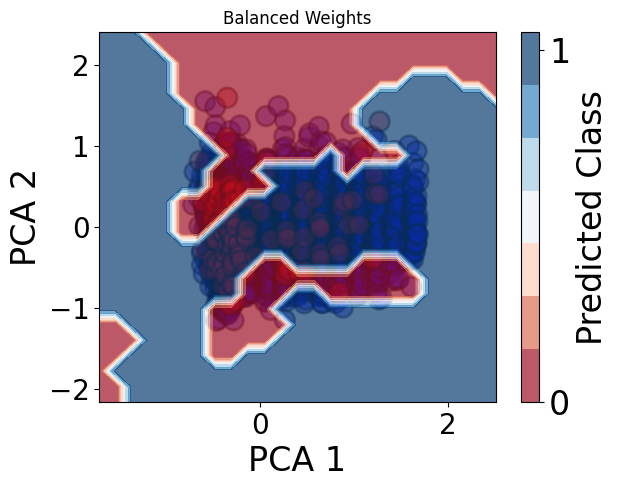

BMR


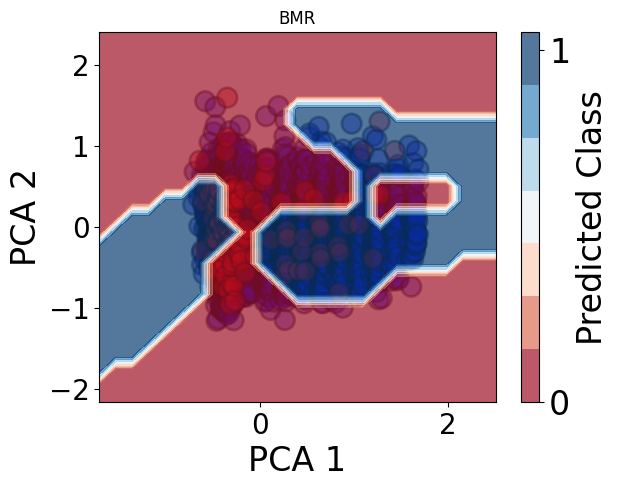

Threshold


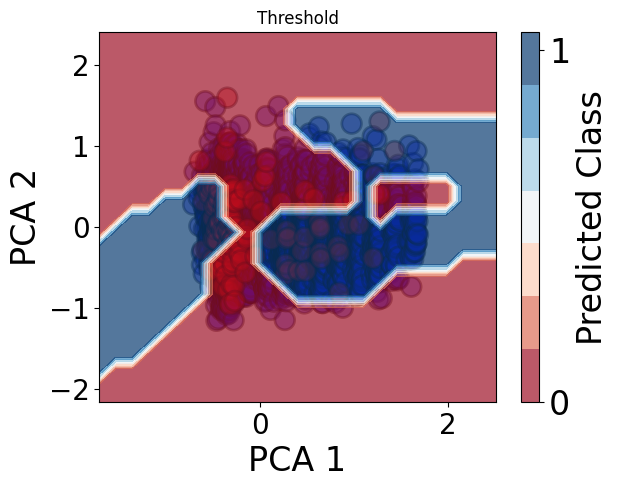

Our Method
Not fit to any data yet, call 'fit(X, y)' or  method first


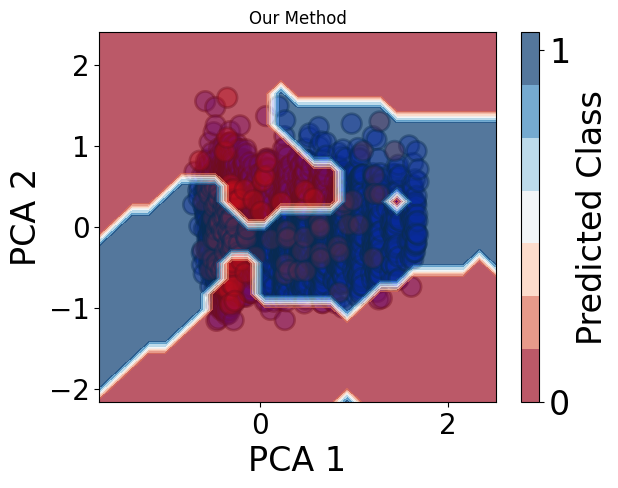

Giving bias from original classifier


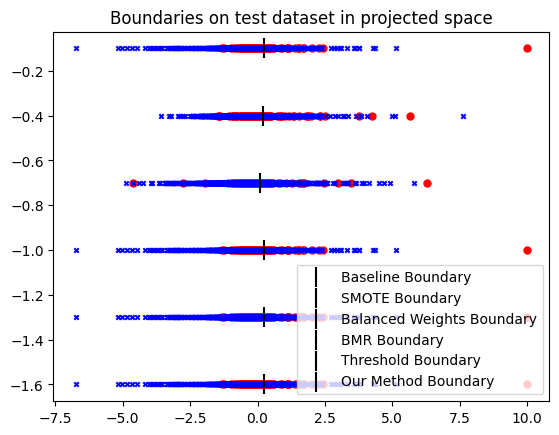

LATEX table format


\begin{tabular}{lrrr}
 & Accuracy & G-Mean & F1 \\
Method &  &  &  \\
Baseline & 0.7551 & 0.5424 & 0.0660 \\
SMOTE & 0.7217 & 0.5830 & 0.0702 \\
Balanced Weights & 0.7471 & 0.4981 & 0.0551 \\
BMR & 0.6875 & 0.5589 & 0.0609 \\
Threshold & 0.6875 & 0.5589 & 0.0609 \\
Our Method & 0.7551 & 0.5424 & 0.0660 \\
\end{tabular}



,Accuracy,G-Mean,F1
Method,,,
Baseline,0.755064,0.542365,0.066011
SMOTE,0.721731,0.583040,0.070154
Balanced Weights,0.747145,0.498122,0.055058
BMR,0.687477,0.558910,0.060874
Threshold,0.687477,0.558910,0.060874
Our Method,0.755064,0.542365,0.066011


In [7]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])